# Imports

## Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
insurance_url = '/content/drive/My Drive/1000ml/Project 4 - Insurance/insurance.csv'
insurance_df = pd.read_csv(insurance_url)

# Data Discovery

Important information found here:

1. Count of records: $9134$
2. $9134$ unique customers
3. Is regarding car insurance, and claims over their lifetime with the company
4. First customer(s): 99 months ago (8yrs, 3 mos)
5. Only operates in 5 states
6. No Null values
7. Number people with open complaints = 1882

In [0]:
# Number unique entries in each column
insurance_df.nunique()

Customer                         9134
State                               5
Customer_Lifetime_Value          5674
Response                            2
Coverage                            3
Education                           5
Effective_To_Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location_Code                       3
Marital_Status                      3
Monthly_Premium_Auto              202
Months_Since_Last_Claim            36
Months_Since_Policy_Inception     100
Number_of_Open_Complaints           6
Number_of_Policies                  9
Policy_Type                         3
Policy                              9
Renew_Offer_Type                    4
Sales_Channel                       4
Total_Claim_Amount               5106
Vehicle_Class                       6
Vehicle_Size                        3
dtype: int64

In [93]:
category_cols = ['State','Response','Coverage','Education','EmploymentStatus',
                 'Gender','Location_Code','Marital_Status','Policy_Type','Policy',
                 'Renew_Offer_Type','Sales_Channel','Vehicle_Class','Vehicle_Size']

numerical_cols = ['Customer_Lifetime_Value','Income','Monthly_Premium_Auto',
                  'Months_Since_Last_Claim','Months_Since_Policy_Inception', 
                  'Number_of_Open_Complaints','Number_of_Policies','Total_Claim_Amount']

# QC
# Length category_cols + Length numerical cols = length df cols -2  (customer, effective_to_date not included in cols)
len(category_cols)+len(numerical_cols)+2==len(insurance_df.columns)

False

In [0]:
insurance_df.sort_values(by='Monthly_Premium_Auto', ascending=False).head(5)

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
7457,IU83998,Washington,11196,No,Premium,Bachelor,2001-01-11,Unemployed,F,0,Suburban,Married,298,26,94,0,1,Personal Auto,Personal L3,Offer1,Branch,2145.600000,Luxury Car,Medsize
1552,UU93074,California,11701,No,Premium,College,2001-05-11,Employed,M,32435,Suburban,Married,297,24,68,0,1,Personal Auto,Personal L1,Offer1,Agent,1767.348807,Luxury Car,Medsize
6905,TX35222,Washington,11619,No,Premium,College,2001-07-11,Employed,F,27750,Suburban,Married,297,28,25,1,1,Personal Auto,Personal L2,Offer1,Branch,1425.600000,Luxury Car,Medsize
5827,EZ30537,Oregon,23985,No,Premium,Doctor,2001-01-11,Employed,F,79655,Rural,Married,296,12,17,0,9,Personal Auto,Personal L3,Offer2,Branch,498.159874,Luxury Car,Medsize
2504,PU71194,Oregon,35204,No,Premium,Bachelor,2/26/11,Employed,F,56343,Suburban,Divorced,295,11,69,0,2,Personal Auto,Personal L3,Offer1,Branch,1612.962321,Luxury Car,Medsize


In [0]:
insurance_df[['Customer', 'Effective_To_Date','Months_Since_Policy_Inception']].sample(10)

,Customer,Effective_To_Date,Months_Since_Policy_Inception
5507,PF24757,2001-09-11,19
8925,UW20734,2001-09-11,50
5129,QD17769,2002-12-11,11
991,KP18988,1/19/11,35
4705,EY27917,2001-10-11,90
6864,PE42960,2001-07-11,15
5359,SY48591,1/17/11,91
4237,CO25601,2001-01-11,90
7383,UH89141,1/23/11,7
5498,YP79029,2002-07-11,26


In [0]:
insurance_df.dtypes

Customer                          object
State                             object
Customer_Lifetime_Value            int64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
dtype: object

In [0]:
# Income of zero customers?
# If a person is unemployed, their income is 0, and vice versa. 
# There are unemployed people with all the same policies as the full data set. 
# What's the difference between Corporate and Personal policies?
income0 = insurance_df[insurance_df['Income']==0]
unemp = insurance_df[insurance_df['EmploymentStatus']=='Unemployed']
print(f'Num 0 income: {len(income0)}\nNum Unemployed: {len(unemp)}')
insurance_df[(insurance_df['Income']==0) & (insurance_df['EmploymentStatus']=='Unemployed')]

Num 0 income: 2317
Num Unemployed: 2317


,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
1,QZ44356,Arizona,6980,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
3,WW63253,California,7646,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
7,CF85061,Arizona,7216,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
10,SX51350,California,4739,No,Basic,College,2/21/11,Unemployed,M,0,Suburban,Single,67,23,5,0,3,Personal Auto,Personal L3,Offer1,Agent,482.400000,Four-Door Car,Small
11,VQ65197,California,8197,No,Basic,College,2001-06-11,Unemployed,F,0,Suburban,Married,110,27,87,0,3,Personal Auto,Personal L3,Offer2,Agent,528.000000,SUV,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9123,WZ45103,California,5678,Yes,Extended,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,76,8,44,0,3,Personal Auto,Personal L2,Offer2,Agent,364.800000,Four-Door Car,Small
9125,RX91025,California,19872,No,Premium,High School or Below,1/31/11,Unemployed,M,0,Suburban,Single,185,26,35,0,2,Personal Auto,Personal L3,Offer1,Agent,1950.725547,SUV,Small
9126,AC13887,California,4629,No,Basic,Bachelor,2001-09-11,Unemployed,M,0,Suburban,Single,67,25,21,0,4,Corporate Auto,Corporate L1,Offer1,Branch,482.400000,Two-Door Car,Medsize
9131,TD14365,California,8164,No,Extended,Bachelor,2002-06-11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [0]:
insurance_df['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

## Histograms for Categorial Data

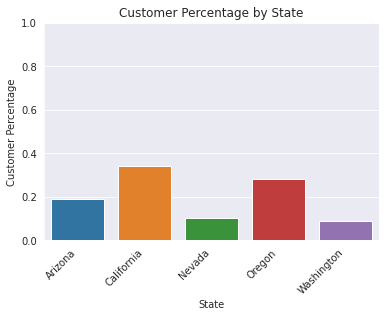

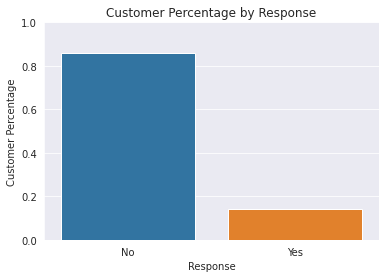

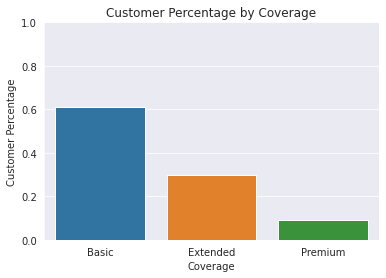

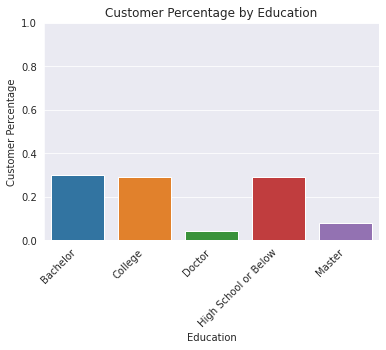

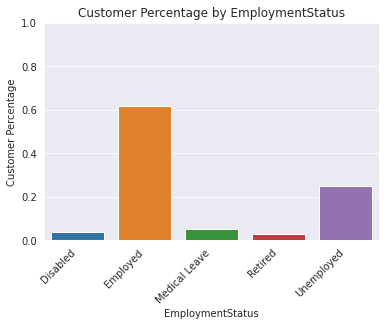

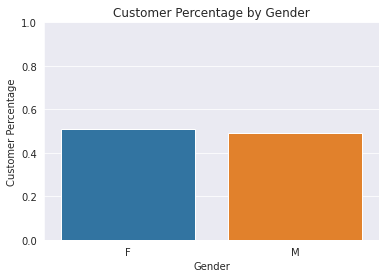

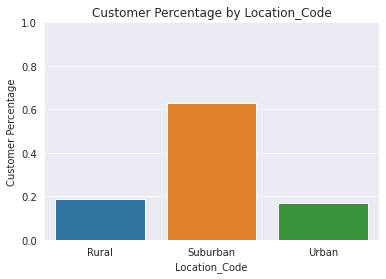

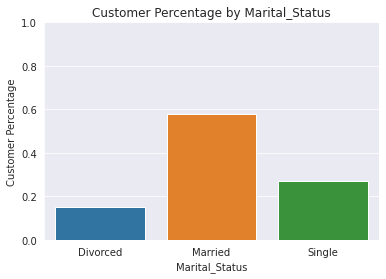

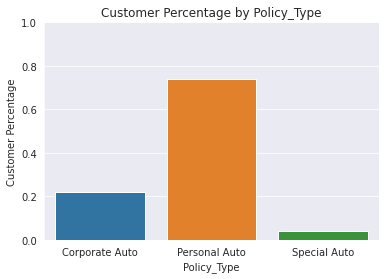

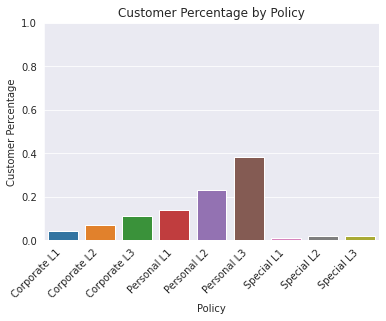

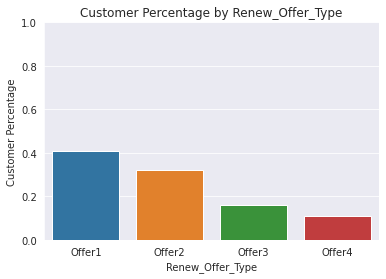

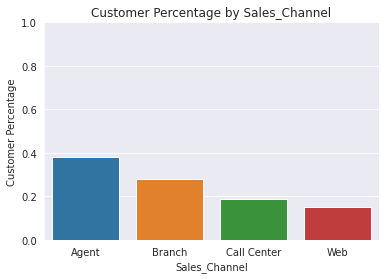

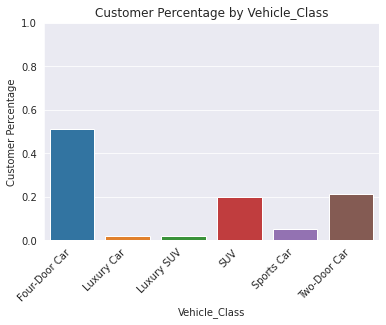

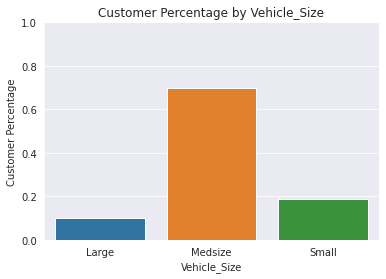

In [0]:
sns.set_style('ticks')
for col in category_cols:
  hist_df = round(insurance_df[['Customer',col]].groupby(col).count()/9134,2).reset_index()
  with sns.axes_style("darkgrid"):
    chart = sns.barplot(x=col,y='Customer', data=hist_df)
    if (len(hist_df)>4):
      chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.ylabel('Customer Percentage')
    plt.ylim(0,1)
    plt.title(f'Customer Percentage by {col}')
    plt.show()

## Investigating Numerical Columns

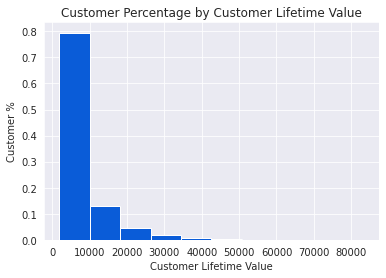

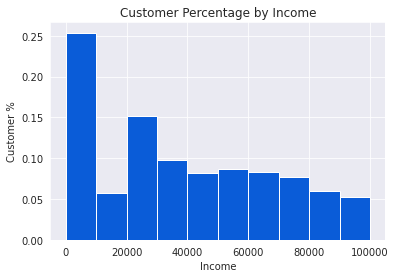

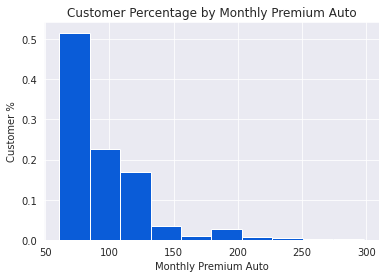

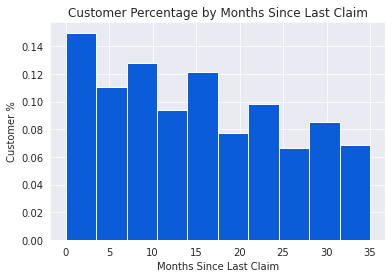

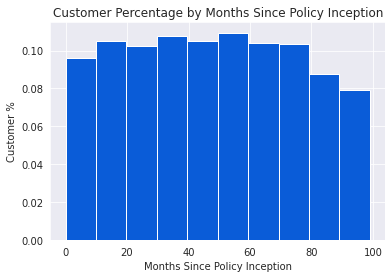

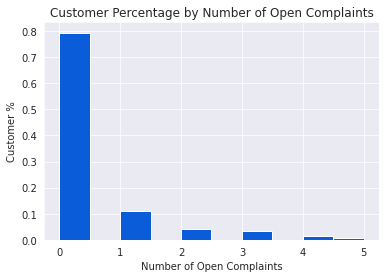

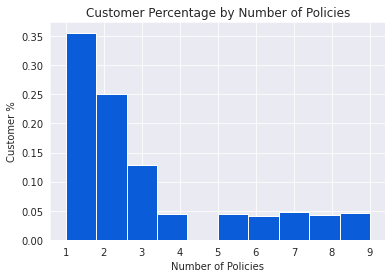

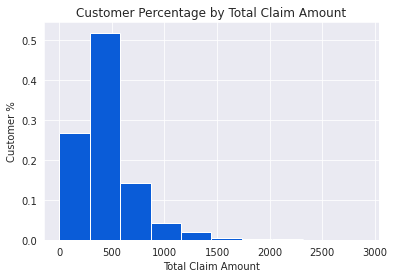

In [113]:
import seaborn as sns
for col in numerical_cols:
  data = insurance_df[col]
  weights = np.ones_like(np.array(data))/float(len(np.array(data)))
  string = str(col).replace('_',' ')
  with sns.axes_style("darkgrid"):
    chart = plt.hist(data, weights=weights, align='mid', color='#0A5CD8')
    plt.ylabel('Customer %')
    plt.xlabel(f'{string}')
    plt.title(f'Customer Percentage by {string}')
    plt.show()

In [0]:
num_df = insurance_df[numerical_cols]

In [115]:
# The highest correlations seem to be the following:
# Monthly_Premium_Auto & Total_Claim_Amount = 0.63
# Monthly_Premium_Auto & Customer_Lifetime_Value = 0.4
# Income & Total_Claim_Amount = -0.35
# Customer_Lifetime_Value & Total_Claim_Amount = 0.23
num_df.corr()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Customer_Lifetime_Value,1.000000,0.024366,0.396261,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly_Premium_Auto,0.396261,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months_Since_Last_Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months_Since_Policy_Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number_of_Open_Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number_of_Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total_Claim_Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [0]:
# Number people open complaints
insurance_df[insurance_df['Number_of_Open_Complaints']>0]

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
12,DP39365,California,8799,No,Premium,Master,2002-06-11,Employed,M,77026,Urban,Married,110,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.029737,Four-Door Car,Medsize
13,SJ95423,Arizona,8819,Yes,Basic,High School or Below,2001-10-11,Employed,M,99845,Suburban,Married,110,23,25,1,8,Corporate Auto,Corporate L3,Offer2,Branch,528.000000,SUV,Medsize
14,IL66569,California,5384,No,Basic,College,1/18/11,Employed,M,83689,Urban,Single,70,21,10,2,8,Corporate Auto,Corporate L3,Offer4,Call Center,307.139132,Four-Door Car,Medsize
15,BW63560,Oregon,7463,No,Basic,Bachelor,1/17/11,Employed,F,24599,Rural,Married,64,12,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920271,Four-Door Car,Medsize
23,TZ98966,Nevada,2450,No,Basic,Bachelor,2/24/11,Unemployed,F,0,Suburban,Single,73,4,44,3,1,Corporate Auto,Corporate L3,Offer1,Branch,554.376763,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,IJ25462,California,2846,No,Basic,Bachelor,2002-07-11,Employed,M,86631,Suburban,Divorced,73,7,44,1,1,Personal Auto,Personal L2,Offer3,Agent,400.832857,Four-Door Car,Small
9119,YX35990,California,5480,Yes,Basic,Master,1/13/11,Employed,M,56005,Suburban,Married,68,31,30,1,3,Corporate Auto,Corporate L2,Offer1,Branch,326.400000,Four-Door Car,Small
9120,RN61682,California,2115,No,Basic,Bachelor,2/19/11,Unemployed,F,0,Suburban,Single,72,30,69,5,1,Personal Auto,Personal L2,Offer3,Web,518.400000,Four-Door Car,Medsize
9121,BB10681,California,4141,No,Extended,College,1/17/11,Unemployed,F,0,Suburban,Divorced,123,5,35,2,1,Corporate Auto,Corporate L3,Offer1,Branch,590.400000,SUV,Medsize


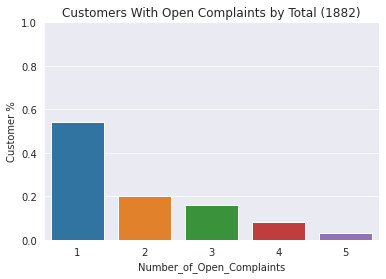

In [0]:
hist_df = round(insurance_df[['Customer','Number_of_Open_Complaints']][insurance_df['Number_of_Open_Complaints']>0].groupby(
              'Number_of_Open_Complaints').count()/1882,2).reset_index()
with sns.axes_style("darkgrid"):
  chart = sns.barplot(x='Number_of_Open_Complaints',y='Customer', data=hist_df)
  plt.ylabel('Customer %')
  plt.ylim(0,1)
  plt.title(f'Customers With Open Complaints by Total (1882)')
  plt.show()

In [115]:
1882/9134

0.20604335449967157

In [0]:
# Let's bin the CLV into deciles
insurance_df['CLV_Deciles'] = pd.qcut(insurance_df['Customer_Lifetime_Value'],q=6)

In [0]:
round(insurance_df[['Customer','CLV_Deciles']].groupby('CLV_Deciles').count()/9134,2).reset_index()

,CLV_Deciles,Customer
0,"(1897.999, 3033.0]",0.17
1,"(3033.0, 4730.0]",0.17
2,"(4730.0, 5780.0]",0.17
3,"(5780.0, 8002.0]",0.17
4,"(8002.0, 11617.833]",0.17
5,"(11617.833, 83325.0]",0.17


In [0]:
insurance_df[insurance_df['Customer_Lifetime_Value']<30000]['Customer'].count()

8945

In [161]:
pd.qcut(insurance_df['Customer_Lifetime_Value'], q=5)

0       (1897.999, 3443.6]
1         (5123.2, 7249.8]
2       (10209.0, 83325.0]
3        (7249.8, 10209.0]
4       (1897.999, 3443.6]
               ...        
9129    (10209.0, 83325.0]
9130    (1897.999, 3443.6]
9131     (7249.8, 10209.0]
9132     (7249.8, 10209.0]
9133    (1897.999, 3443.6]
Name: Customer_Lifetime_Value, Length: 9134, dtype: category
Categories (5, interval[float64]): [(1897.999, 3443.6] < (3443.6, 5123.2] < (5123.2, 7249.8] <
                                    (7249.8, 10209.0] < (10209.0, 83325.0]]

Text(0, 0.5, '# Customers / 8945')

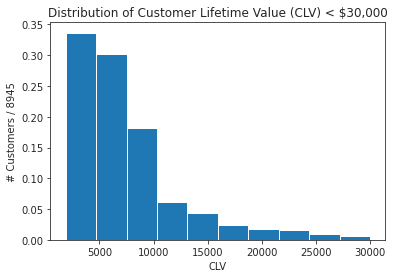

In [0]:
# There are 8945 customers with CLV < $30,000. There are 189 customers above thise value, not included in this graph.
plt.hist(insurance_df[insurance_df['Customer_Lifetime_Value']<30000]['Customer_Lifetime_Value'],bins=10,weights=weights)
plt.title('Distribution of Customer Lifetime Value (CLV) < $30,000')
plt.xlabel('CLV')
plt.ylabel('# Customers / 8945')

In [114]:
189/9134

0.020691920297788484

In [0]:
data = insurance_df[insurance_df['Customer_Lifetime_Value']<30000]['Customer_Lifetime_Value']
weights = np.ones_like(np.array(data))/float(len(np.array(data)))
#plt.hist(data, weights=weights, bins = 100)
weights

array([0.00011179, 0.00011179, 0.00011179, ..., 0.00011179, 0.00011179,
       0.00011179])

In [0]:
insurance_df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,CLV_Deciles
0,BU79786,Washington,2764,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,"(1897.999, 3033.0]"
1,QZ44356,Arizona,6980,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,"(5780.0, 8002.0]"
2,AI49188,Nevada,12887,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,"(11617.833, 83325.0]"
3,WW63253,California,7646,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,"(5780.0, 8002.0]"
4,HB64268,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,"(1897.999, 3033.0]"


## Investigating Categorial Columns

In [0]:
cat_df = insurance_df.drop(columns=numerical_cols)
cat_df

,Customer,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size,CLV_Deciles
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,"(1897.999, 3033.0]"
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,"(5780.0, 8002.0]"
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,"(11617.833, 83325.0]"
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,"(5780.0, 8002.0]"
4,HB64268,Washington,No,Basic,Bachelor,2002-03-11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,"(1897.999, 3033.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2002-10-11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,"(11617.833, 83325.0]"
9130,PK87824,California,Yes,Extended,College,2002-12-11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,"(3033.0, 4730.0]"
9131,TD14365,California,No,Extended,Bachelor,2002-06-11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,"(8002.0, 11617.833]"
9132,UP19263,California,No,Extended,College,2002-03-11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,"(5780.0, 8002.0]"


In [0]:
insurance_df['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [36]:
# Look at the difference in Responses to each offer
offer_acceptance = pd.DataFrame(insurance_df[['Response','Renew_Offer_Type','Customer']].groupby(
    'Renew_Offer_Type').Response.value_counts(normalize = True)).rename(columns={'Response':'Response_Count'}).reset_index()

offer_acceptance

,Renew_Offer_Type,Response,Response_Count
0,Offer1,No,0.841684
1,Offer1,Yes,0.158316
2,Offer2,No,0.766234
3,Offer2,Yes,0.233766
4,Offer3,No,0.979050
5,Offer3,Yes,0.020950
6,Offer4,No,1.000000


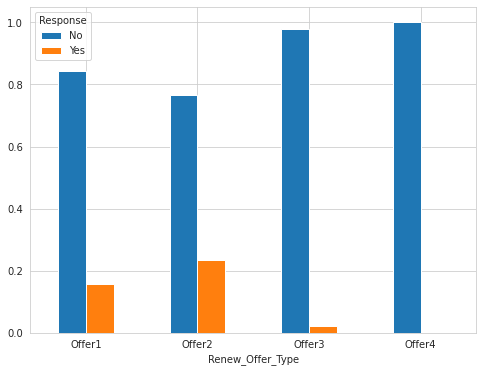

In [37]:
offer_acceptance.pivot(index='Renew_Offer_Type', columns='Response', values='Response_Count').plot(kind='bar',rot=0,figsize=(8,6),grid=True)

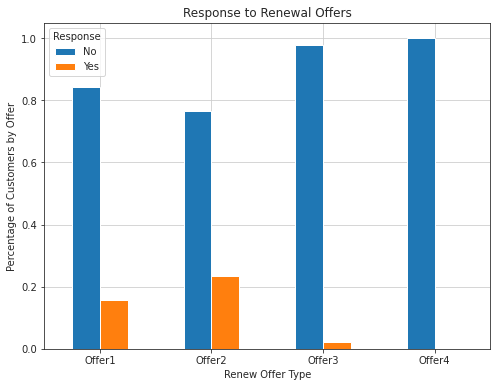

In [0]:
offer_acceptance.pivot(index='Renew_Offer_Type', columns='Response', values='Response_Count').plot(kind='bar',rot=0,figsize=(8,6),grid=True)
plt.xlabel('Renew Offer Type')
plt.ylabel('Percentage of Customers by Offer')
plt.title('Response to Renewal Offers');

# Data Cleaning/Altering

Clean dates

Add column for numerical `Vehicle_Size`: 1(S), 2(M), 3(L)

Add column for numerical `Vehicle_Class`: 1(2D Car), 2(4D Car), 3(SUV), 4(Luxury SUV), 5(Sports Car), 6(Luxury Car)

Change `Response` Column to True/False

Add column for numerical `Coverage`: 1(Basic), 2(Extended), 3(Premium)

Add column for numerical `Education`: 1(HS or less), 2(College), 3(Bachelor), 4(Master), 5(Doctor)

### Full Clean

In [0]:
insurance_df['Effective_To_Date'] = insurance_df['Effective_To_Date'].str.replace('2002','2').str.replace('2001','2').str.replace('-','/')
insurance_df['Effective_To_Date'] = '0' + insurance_df['Effective_To_Date']
insurance_df['Effective_To_Date'] = pd.to_datetime(insurance_df['Effective_To_Date'],format='%m/%d/%y')

v_size_map = {'Small':1,'Medsize':2,'Large':3}
insurance_df['Vehicle_Size_Num'] = insurance_df['Vehicle_Size'].map(v_size_map)

v_class_map = {'Two-Door Car':1, 'Four-Door Car':2, 'SUV':3, 'Luxury SUV':4, 'Sports Car':5, 'Luxury Car':6}
insurance_df['Vehicle_Class_Num'] = insurance_df['Vehicle_Class'].map(v_class_map)

response_map = {'Yes':True,'No':False}
insurance_df['Response_Yes'] = insurance_df['Response'].map(response_map)

coverage_map = {'Basic':1,'Extended':2,'Premium':3}
insurance_df['Coverage_Num'] = insurance_df['Coverage'].map(coverage_map)

education_map = {'High School or Below':1,'College':2,'Bachelor':2,'Master':3,'Doctor':3}
insurance_df['Education_Num'] = insurance_df['Education'].map(education_map)

### Clean Dates

In [0]:
insurance_df['Effective_To_Date'] = insurance_df['Effective_To_Date'].str.replace('2002','2').str.replace('2001','2').str.replace('-','/')
insurance_df['Effective_To_Date'] = '0' + insurance_df['Effective_To_Date']
insurance_df['Effective_To_Date'] = pd.to_datetime(insurance_df['Effective_To_Date'],format='%m/%d/%y')

In [0]:
# QC
insurance_df[['Effective_To_Date','Customer']].dtypes

Effective_To_Date    datetime64[ns]
Customer                     object
dtype: object

### Vehicle Size to Numeric

In [0]:
insurance_df['Vehicle_Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [0]:
v_size_map = {'Small':1,'Medsize':2,'Large':3}
insurance_df['Vehicle_Size_Num'] = insurance_df['Vehicle_Size'].map(v_size_map)

In [0]:
# QC
insurance_df[['Vehicle_Size','Vehicle_Size_Num']].sample(10)

,Vehicle_Size,Vehicle_Size_Num
315,Medsize,2
4997,Medsize,2
561,Medsize,2
6395,Large,3
7987,Medsize,2
5621,Medsize,2
3628,Small,1
5201,Medsize,2
5631,Medsize,2
5191,Medsize,2


### Vehicle Class to Numeric

In [0]:
insurance_df['Vehicle_Class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [0]:
v_class_map = {'Two-Door Car':1, 'Four-Door Car':2, 'SUV':3, 'Luxury SUV':4, 'Sports Car':5, 'Luxury Car':6}
insurance_df['Vehicle_Class_Num'] = insurance_df['Vehicle_Class'].map(v_class_map)

In [0]:
# QC
insurance_df[['Vehicle_Class','Vehicle_Class_Num']].sample(10)

,Vehicle_Class,Vehicle_Class_Num
7179,Four-Door Car,2
7388,Four-Door Car,2
1729,SUV,3
7793,Four-Door Car,2
3563,Four-Door Car,2
6045,Four-Door Car,2
4134,SUV,3
7448,Four-Door Car,2
1698,Four-Door Car,2
4280,Sports Car,5


### Response to binary

In [0]:
insurance_df['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [0]:
response_map = {'Yes':True,'No':False}
insurance_df['Response_Yes'] = insurance_df['Response'].map(response_map)

In [0]:
# QC
display(insurance_df['Response_Yes'].sum())
insurance_df['Response'].value_counts()

1308

No     7826
Yes    1308
Name: Response, dtype: int64

### Coverage to Numeric

In [0]:
insurance_df['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [0]:
coverage_map = {'Basic':1,'Extended':2,'Premium':3}
insurance_df['Coverage_Num'] = insurance_df['Coverage'].map(coverage_map)

In [0]:
# QC
insurance_df[['Coverage','Coverage_Num']].sample(10)

,Coverage,Coverage_Num
4210,Basic,1
6997,Extended,2
9076,Extended,2
8634,Basic,1
4894,Basic,1
255,Extended,2
2838,Basic,1
429,Premium,3
7473,Extended,2
7147,Basic,1


### Education to Numeric

In [0]:
insurance_df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [0]:
education_map = {'High School or Below':1,'College':2,'Bachelor':2,'Master':3,'Doctor':3}
insurance_df['Education_Num'] = insurance_df['Education'].map(education_map)

In [0]:
# QC
insurance_df[['Education','Education_Num']].sample(15)

,Education,Education_Num
1563,College,2
2162,Bachelor,2
8103,College,2
627,High School or Below,1
6729,Bachelor,2
6277,High School or Below,1
4656,High School or Below,1
5980,High School or Below,1
198,High School or Below,1
8418,College,2


# Some Questions to ask

1. If we try clustering with only the numeric values, how do the categorical values fit into this classification?
2. If we try clustering with some of the categorical values (that we can make numeric, in terms of a data hierarchy) how does the other categorical data fall into these new clusters?


In order to do clustering, I think it will be best to only try KMeans and DBSCAN. We can try Hierarchical clustering only if there is some extra time, but given the number of variables and the number of records, this would take a very long time to run

## KMeans

From what was found with agglomerative clustering, there seems to be better results when location data is not used. After trying this in the code below, I find that the scores do not improved (and sometimes worse) for the KMeans method. 

Additionally, since numerical data is found to have very little variance, only the categorical data is used. Thus we only really made use of KModes.

### Using the Numerical Data

Even with 18 clusters, the inerita scores here yield no real results.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
numerical_cols_alter = [
                        'Customer_Lifetime_Value',
                        #'Income',
                        'Monthly_Premium_Auto',
                        'Total_Claim_Amount',
                        'Months_Since_Last_Claim',
                        'Months_Since_Policy_Inception', 
                        #'Number_of_Open_Complaints',
                        #'Number_of_Policies'
                        ]

In [0]:
# Pick data
x = insurance_df[numerical_cols_alter]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [0]:
# Define a list of cluster sizes
clusters = [k for k in np.arange(2,50,2)]

# Define KMeans
kmeans = [KMeans(n_clusters=k, n_init=10) for k in clusters]

# Fit KMeans 
kmeans_fit = [KM.fit(x_scale) for KM in kmeans]

# Inertia scores
inertias = [km_fit.inertia_ for km_fit in kmeans_fit]

Text(0, 0.5, 'Inertia Value')

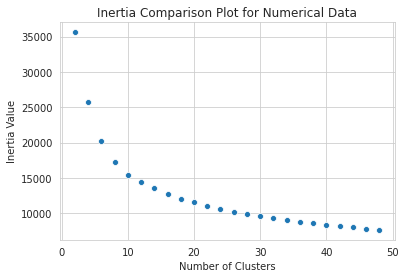

In [0]:
# Plot the inertias:
sns.scatterplot(clusters, inertias, )
plt.title('Inertia Comparison Plot for Numerical Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')

#### Possible Best Scores

In [0]:
numerical_cols_alter = ['Customer_Lifetime_Value','Income','Monthly_Premium_Auto','Total_Claim_Amount',
                        #'Months_Since_Last_Claim','Months_Since_Policy_Inception', 
                        #'Number_of_Open_Complaints','Number_of_Policies'
                        ]

# Pick data
x = insurance_df[numerical_cols_alter]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [0]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(x_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
data = insurance_df[numerical_cols_alter]
data['KMeans_Labels'] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
silhouette_score(x_scale, labels=kmeans.labels_)

0.19516657397842713

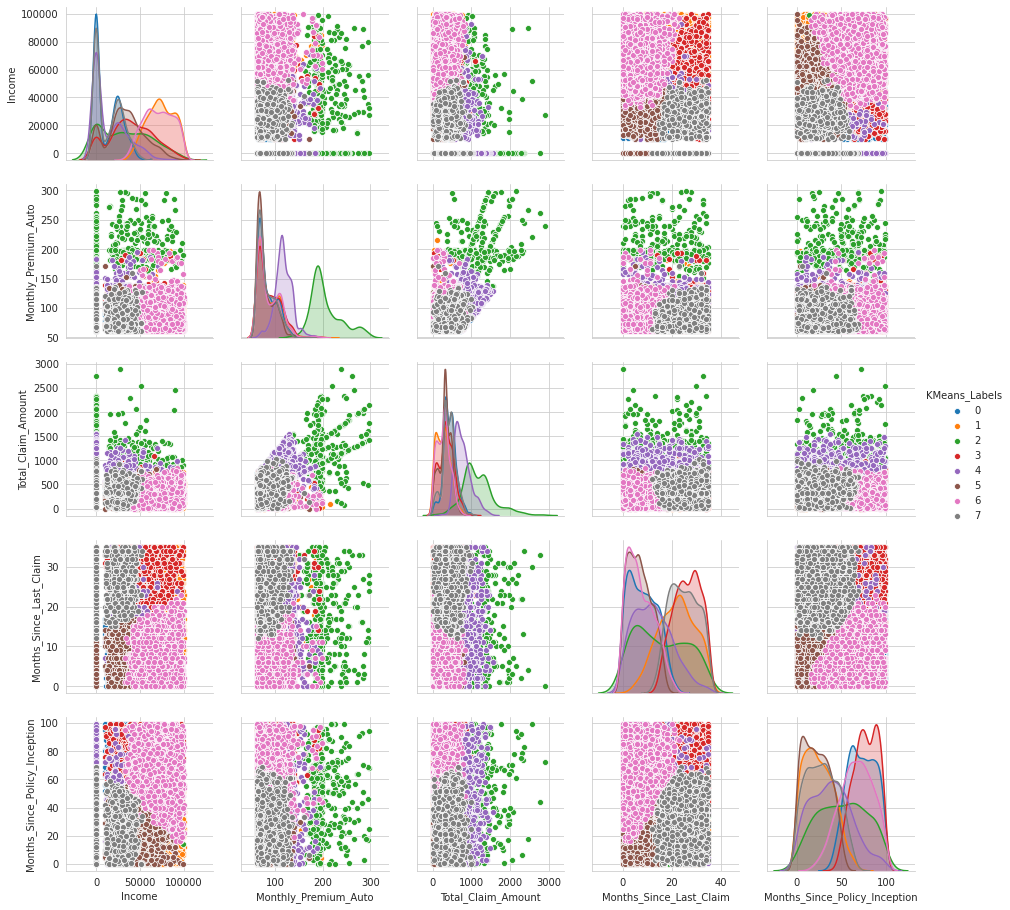

In [0]:
sns.pairplot(data, hue = 'KMeans_Labels')

### Using Numerical and Categorical turned Numeric Data

In [0]:
cat_num_cols = ['Vehicle_Size_Num','Vehicle_Class_Num','Coverage_Num','Education_Num']

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [0]:
# Pick data
x = insurance_df[numerical_cols+cat_num_cols]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [0]:
# Define a list of cluster sizes
clusters = [k for k in range(2,50)]

# Define KMeans
kmeans = [KMeans(n_clusters=k, n_init=10) for k in clusters]

# Fit KMeans 
kmeans_fit = [KM.fit(x_scale) for KM in kmeans]

# Inertia scores
inertias = [km_fit.inertia_ for km_fit in kmeans_fit]

Text(0, 0.5, 'Inertia Value')

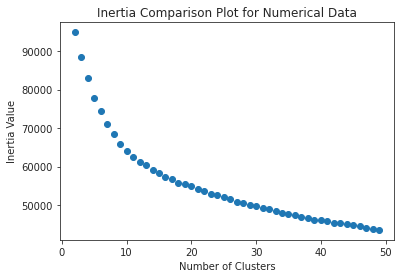

In [0]:
# Plot the inertias:
plt.scatter(clusters, inertias)
plt.title('Inertia Comparison Plot for Numerical Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')

### Try with just categorical variables

In [0]:
# First lets see if we can turn any more categorical variables into binary (numeric)
insurance_df[category_cols].head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [0]:
insurance_df = pd.get_dummies(insurance_df,columns=['Gender','Renew_Offer_Type','Policy_Type','Location_Code'])

In [0]:
insurance_df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Income',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Policy', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size', 'Vehicle_Size_Num',
       'Vehicle_Class_Num', 'Response_Yes', 'Coverage_Num', 'Education_Num',
       'Gender_F', 'Gender_M', 'Renew_Offer_Type_Offer1',
       'Renew_Offer_Type_Offer2', 'Renew_Offer_Type_Offer3',
       'Renew_Offer_Type_Offer4', 'Policy_Type_Corporate Auto',
       'Policy_Type_Personal Auto', 'Policy_Type_Special Auto',
       'Location_Code_Rural', 'Location_Code_Suburban', 'Location_Code_Urban'],
      dtype='object')

In [0]:
new_cat_cols = ['Vehicle_Size_Num','Vehicle_Class_Num', 'Response_Yes', 'Coverage_Num', 'Education_Num', 
                'Gender_F', 'Gender_M', 'Renew_Offer_Type_Offer1','Renew_Offer_Type_Offer2', 
                'Renew_Offer_Type_Offer3', 'Renew_Offer_Type_Offer4', 'Policy_Type_Corporate Auto', 
                'Policy_Type_Personal Auto', 'Policy_Type_Special Auto', 'Location_Code_Rural', 
                'Location_Code_Suburban', 'Location_Code_Urban']

In [86]:
!pip install kmodes

In [87]:
!pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.6/dist-packages (0.10.2)


In [0]:
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [0]:
# Pick data
x = insurance_df[dummy_cat_cols]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [0]:
# Define a list of cluster sizes
clusters = [k for k in np.arange(2,52,2)]

# Define KMeans
kmodes = [KModes(n_clusters=k, n_init=10) for k in clusters]

# Fit KMeans 
kmodes_fit = [KM.fit(x_scale) for KM in kmodes]

# There is no inertia score for KModes, we will use the silhouette score
# First, we need the labels
kmodes_labels = [km_fit.labels_ for km_fit in kmodes_fit]

# Calculate the silhouettes (we will try the cosine distance first)
silhouettes = [km_fit.labels_ for km_fit in kmodes_fit]

In [0]:
silhouettes_man = [silhouette_score(x_scale, labels, metric = 'manhattan') for labels in kmodes_labels]
silhouettes_euc = [silhouette_score(x_scale, labels, metric = 'euclidean') for labels in kmodes_labels]
silhouettes_cos = [silhouette_score(x_scale, labels, metric = 'cosine') for labels in kmodes_labels]

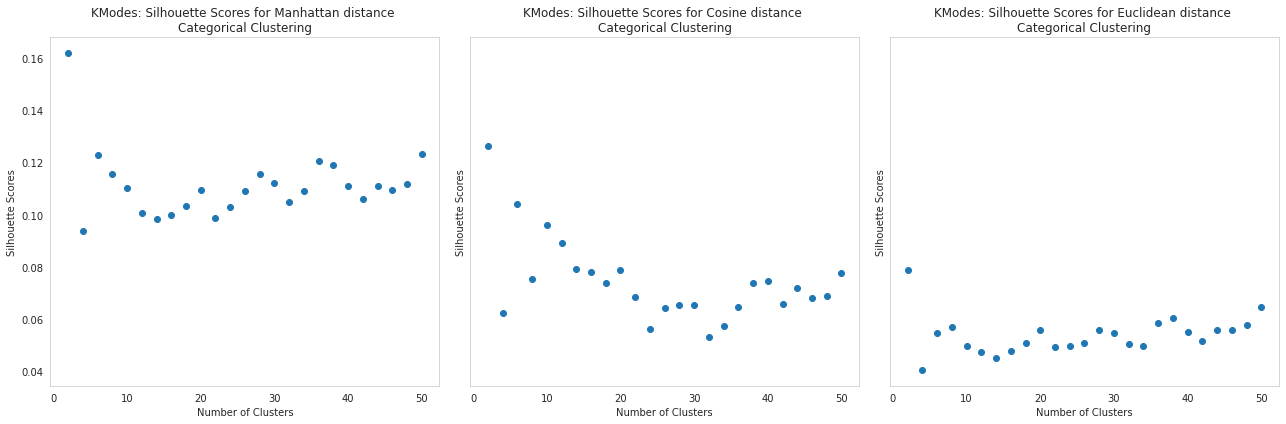

In [93]:
# Plot the silhouette scores:
fig,[ax1,ax2,ax3] = plt.subplots(1,3,figsize=(18,6),sharey=True)

ax1.scatter(clusters, silhouettes_man)
ax1.set_title('KModes: Silhouette Scores for Manhattan distance \nCategorical Clustering')
ax1.set(xlabel='Number of Clusters', ylabel='Silhouette Scores')
ax1.grid(which='major')

ax2.scatter(clusters, silhouettes_cos)
ax2.set_title('KModes: Silhouette Scores for Cosine distance \nCategorical Clustering')
ax2.set(xlabel='Number of Clusters', ylabel='Silhouette Scores')
ax2.grid(which='major')

ax3.scatter(clusters, silhouettes_euc)
ax3.set_title('KModes: Silhouette Scores for Euclidean distance \nCategorical Clustering')
ax3.set(xlabel='Number of Clusters', ylabel='Silhouette Scores')
ax3.grid(which='major')

fig.tight_layout()

## DBSCAN

Similar to previous, trying out only categorical data, ignoring location data, DBSCAN still isn't giving great scores, and is defining many of the points as noise. Nearly always have greater than 50% of the data as noise. 

Because of this, I don't think I can use this method for modelling as it is untrustworthy. 

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [0]:
# Pick data
x = insurance_df[numerical_cols_alter]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [0]:
# The original parameter list
# metric_ls = ['euclidean','manhattan','cosine']
# eps_ls = np.arange(0.1,0.7,0.05)
# min_sample_ls = [s for s in range(3,8)]

# After running, I find that there are way too many clusters for certain values, which is not what I want. 
# The cosine distance also just doesn't work. Let's resample
metric_ls = ['euclidean']
eps_ls = np.arange(0.8,2,0.1)
min_sample_ls = [s for s in range(4, 10)]

In [0]:
# This makes a nested list for DBSCANs where we can see array[eps][min_samples][metric]
dbs = [[[DBSCAN(eps = e, metric = m, min_samples = s) 
              for m in metric_ls] 
                for s in min_sample_ls] 
                  for e in eps_ls]

In [0]:
# Now fit all our models
db_fits = [[[dbs[e][s][m].fit(x_scale)
                  for m in range(len(metric_ls))]
                    for s in range(len(min_sample_ls))]
                      for e in range(len(eps_ls))]

In [0]:
# Get the labels
db_fit_labels = [[[db_fits[e][s][m].labels_
                  for m in range(len(metric_ls))]
                    for s in range(len(min_sample_ls))]
                      for e in range(len(eps_ls))]

In [0]:
# Get the indices of the noise points
noise = [[[np.where(db_fit_labels[e][s][m] != -1)[0]
           for m in range(len(metric_ls))]
             for s in range(len(min_sample_ls))]
               for e in range(len(eps_ls))]

In [0]:
noisecount = [[[np.where(db_fit_labels[e][s][m] == -1)[0]
           for m in range(len(metric_ls))]
             for s in range(len(min_sample_ls))]
               for e in range(len(eps_ls))]

In [0]:
# Get the silhouette scores
silhouettes = [[[m*s*e for m in range(len(metric_ls))] for s in range(len(min_sample_ls))] for e in range(len(eps_ls))]
for e in range(len(eps_ls)):
  for s in range(len(min_sample_ls)):
    for m in range(len(metric_ls)):
      try:
        silhouettes[e][s][m] = silhouette_score(x_scale[noise[e][s][m]], labels=db_fit_labels[e][s][m][noise[e][s][m]], metric = metric_ls[m])
      except:
        silhouettes[e][s][m] = np.nan

In [0]:
def min_max_avg(eps, min_samp, metric):
  low = min(db_fit_labels[eps][min_samp][metric][noise[eps][min_samp][metric]])
  high = max(db_fit_labels[eps][min_samp][metric][noise[eps][min_samp][metric]])
  avg = round(np.mean(db_fit_labels[eps][min_samp][metric][noise[eps][min_samp][metric]]),2)
  ncount = len(db_fit_labels[eps][min_samp][metric][noisecount[eps][min_samp][metric]])
  return f'Min: {low}, Max: {high}, Avg: {avg}, Count of Noise: {ncount}, Score: {round(silhouettes[eps][min_samp][metric],2)}, Eps: {round(eps_ls[eps],2)}, Min_samples: {min_sample_ls[min_samp]}, metric: {metric_ls[metric]}, '

In [0]:
eps_ls[9]

1.6999999999999997

In [0]:
for e in range(len(eps_ls)):
  for s in range(len(min_sample_ls)):
    for m in range(len(metric_ls)):
      print(min_max_avg(e,s,m))

Min: 0, Max: 31, Avg: 0.9, Count of Noise: 451, Score: -0.05, Eps: 0.8, Min_samples: 4, metric: euclidean, 
Min: 0, Max: 26, Avg: 0.81, Count of Noise: 525, Score: -0.04, Eps: 0.8, Min_samples: 5, metric: euclidean, 
Min: 0, Max: 26, Avg: 0.8, Count of Noise: 595, Score: -0.03, Eps: 0.8, Min_samples: 6, metric: euclidean, 
Min: 0, Max: 20, Avg: 0.69, Count of Noise: 698, Score: -0.03, Eps: 0.8, Min_samples: 7, metric: euclidean, 
Min: 0, Max: 20, Avg: 0.56, Count of Noise: 770, Score: -0.04, Eps: 0.8, Min_samples: 8, metric: euclidean, 
Min: 0, Max: 18, Avg: 0.48, Count of Noise: 850, Score: -0.05, Eps: 0.8, Min_samples: 9, metric: euclidean, 
Min: 0, Max: 23, Avg: 0.71, Count of Noise: 347, Score: -0.03, Eps: 0.9, Min_samples: 4, metric: euclidean, 
Min: 0, Max: 18, Avg: 0.67, Count of Noise: 394, Score: -0.02, Eps: 0.9, Min_samples: 5, metric: euclidean, 
Min: 0, Max: 20, Avg: 0.69, Count of Noise: 440, Score: -0.03, Eps: 0.9, Min_samples: 6, metric: euclidean, 
Min: 0, Max: 17, Avg:

In [0]:
145/9134

0.015874753667615503

In [0]:
np.set_printoptions()

In [0]:
silhouettes

While these might all seem good, the number of clusters we find here are nearly always upwards of 200, which I think is too many clusters for this to be effective. There are also way too many noise points in all of them. 

Let's see what happens with a DBSCAN on the categorical variables?

### Possible good scores

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [0]:
# Pick data
x = insurance_df[numerical_cols]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [0]:
db = DBSCAN(eps=1.7, min_samples=5, metric='euclidean')
db.fit(x_scale)

DBSCAN(algorithm='auto', eps=1.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### DBSCAN with categorical variables

In [0]:
insurance_df = pd.get_dummies(insurance_df,columns=['Gender','Renew_Offer_Type','Policy_Type','Location_Code'])
new_cat_cols = ['Vehicle_Size_Num','Vehicle_Class_Num', 'Response_Yes', 'Coverage_Num', 'Education_Num', 
                'Gender_F', 'Gender_M', 'Renew_Offer_Type_Offer1','Renew_Offer_Type_Offer2', 
                'Renew_Offer_Type_Offer3', 'Renew_Offer_Type_Offer4', 'Policy_Type_Corporate Auto', 
                'Policy_Type_Personal Auto', 'Policy_Type_Special Auto', 'Location_Code_Rural', 
                'Location_Code_Suburban', 'Location_Code_Urban']

In [0]:
# Pick data
x = insurance_df[dummy_cat_cols]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [0]:
# Parameter list
metric_ls = ['euclidean']
eps_ls = np.arange(0.8,2,0.1)
min_sample_ls = [s for s in range(4,10)]

In [0]:
# This makes a nested list for DBSCANs where we can see array[eps][min_samples][metric]
dbs = [[[DBSCAN(eps = e, metric = m, min_samples = s) 
              for m in metric_ls] 
                for s in min_sample_ls] 
                  for e in eps_ls]

In [0]:
# Now fit all our models
db_fits = [[[dbs[e][s][m].fit(x_scale)
                  for m in range(len(metric_ls))]
                    for s in range(len(min_sample_ls))]
                      for e in range(len(eps_ls))]

In [0]:
# Get the labels
db_fit_labels = [[[db_fits[e][s][m].labels_
                  for m in range(len(metric_ls))]
                    for s in range(len(min_sample_ls))]
                      for e in range(len(eps_ls))]

In [0]:
# Get the indices of the noise points
noise = [[[np.where(db_fit_labels[e][s][m] != -1)[0]
           for m in range(len(metric_ls))]
             for s in range(len(min_sample_ls))]
               for e in range(len(eps_ls))]

In [0]:
noisecount = [[[np.where(db_fit_labels[e][s][m] == -1)[0]
                for m in range(len(metric_ls))]
                  for s in range(len(min_sample_ls))]
                    for e in range(len(eps_ls))]

In [0]:
# Get the silhouette scores
silhouettes = [[[m*s*e for m in range(len(metric_ls))] for s in range(len(min_sample_ls))] for e in range(len(eps_ls))]
for e in range(len(eps_ls)):
  for s in range(len(min_sample_ls)):
    for m in range(len(metric_ls)):
      try:
        silhouettes[e][s][m] = silhouette_score(x_scale[noise[e][s][m]], labels=db_fit_labels[e][s][m][noise[e][s][m]], metric = metric_ls[m])
      except:
        silhouettes[e][s][m] = np.nan

In [0]:
silhouettes

In [0]:
def min_max_avg_db(eps, min_samp, metric, silhouette):
  low = min(db_fit_labels[eps][min_samp][metric][noise[eps][min_samp][metric]])
  high = max(db_fit_labels[eps][min_samp][metric][noise[eps][min_samp][metric]])
  avg = round(np.mean(db_fit_labels[eps][min_samp][metric][noise[eps][min_samp][metric]]),2)
  return f'Min: {low}, Max: {high}, Avg: {avg}, Count of Noise {len(db_fit_labels[eps][min_samp][metric][noisecount[eps][min_samp][metric]])}, Score: {round(silhouette[eps][min_samp][metric],2)}, eps: {eps_ls[eps]}, Min_Samples: {min_sample_ls[min_samp]}, Metric: {metric_ls[metric]}'

In [0]:
for e in range(len(eps_ls)):
  for s in range(len(min_sample_ls)):
    for m in range(len(metric_ls)):
      try:
        print(min_max_avg_db(e,s,m,silhouettes))
      except:
        print('nan')

Min: 0, Max: 182, Avg: 89.7, Count of Noise: 8259, Score: 1.0, Eps: 0.8, Min_samples: 4, metric: euclidean, 
Min: 0, Max: 110, Avg: 54.97, Count of Noise: 8548, Score: 1.0, Eps: 0.8, Min_samples: 5, metric: euclidean, 
Min: 0, Max: 30, Avg: 15.0, Count of Noise: 8948, Score: 1.0, Eps: 0.8, Min_samples: 6, metric: euclidean, 
nan
nan
nan
Min: 0, Max: 188, Avg: 92.53, Count of Noise: 8233, Score: 0.98, Eps: 0.9, Min_samples: 4, metric: euclidean, 
Min: 0, Max: 111, Avg: 55.44, Count of Noise: 8543, Score: 1.0, Eps: 0.9, Min_samples: 5, metric: euclidean, 
Min: 0, Max: 30, Avg: 15.0, Count of Noise: 8948, Score: 1.0, Eps: 0.9, Min_samples: 6, metric: euclidean, 
nan
nan
nan
Min: 0, Max: 195, Avg: 95.77, Count of Noise: 8177, Score: 0.95, Eps: 1.0, Min_samples: 4, metric: euclidean, 
Min: 0, Max: 114, Avg: 56.87, Count of Noise: 8511, Score: 0.97, Eps: 1.0, Min_samples: 5, metric: euclidean, 
Min: 0, Max: 33, Avg: 16.39, Count of Noise: 8922, Score: 0.97, Eps: 1.0, Min_samples: 6, metric: 

## Re-initialize

In [0]:
insurance_df = pd.read_csv(insurance_url)

In [0]:
insurance_df['Effective_To_Date'] = insurance_df['Effective_To_Date'].str.replace('2002','2').str.replace('2001','2').str.replace('-','/')
insurance_df['Effective_To_Date'] = '0' + insurance_df['Effective_To_Date']
insurance_df['Effective_To_Date'] = pd.to_datetime(insurance_df['Effective_To_Date'],format='%m/%d/%y')

v_size_map = {'Small':1,'Medsize':2,'Large':3}
insurance_df['Vehicle_Size_Num'] = insurance_df['Vehicle_Size'].map(v_size_map)

v_class_map = {'Two-Door Car':1, 'Four-Door Car':2, 'SUV':3, 'Luxury SUV':4, 'Sports Car':5, 'Luxury Car':6}
insurance_df['Vehicle_Class_Num'] = insurance_df['Vehicle_Class'].map(v_class_map)

response_map = {'Yes':1,'No':0}
insurance_df['Response_Yes'] = insurance_df['Response'].map(response_map)

coverage_map = {'Basic':1,'Extended':2,'Premium':3}
insurance_df['Coverage_Num'] = insurance_df['Coverage'].map(coverage_map)

education_map = {'High School or Below':1,'College':2,'Bachelor':3,'Master':4,'Doctor':5}
insurance_df['Education_Num'] = insurance_df['Education'].map(education_map)

insurance_df = pd.get_dummies(insurance_df,columns=['State','Gender','Renew_Offer_Type','Policy_Type','Location_Code',
                                                    'EmploymentStatus','Marital_Status','Policy','Sales_Channel'])

In [0]:
unused_cols = [
               'Customer',
               'Effective_To_Date' 
               ]

numerical_cols = [
                  'Customer_Lifetime_Value',
                  'Income',
                  'Monthly_Premium_Auto',
                  'Total_Claim_Amount',
                  'Months_Since_Last_Claim',
                  'Months_Since_Policy_Inception', 
                  'Number_of_Open_Complaints',
                  'Number_of_Policies'
                  ]

ordinal_cat_cols = [
                    'Vehicle_Size_Num',
                    'Vehicle_Class_Num', 
                    'Coverage_Num', 
                    'Education_Num'                    
                    ]

dummy_cat_cols = [
                  # 'State_Arizona', 
                  # 'State_California', 
                  # 'State_Nevada', 
                  # 'State_Oregon',
                  # 'State_Washington', 
                  'Gender_F', 
                  'Gender_M', 
                  # 'Response_Yes', 
                  # 'Renew_Offer_Type_Offer1',
                  # 'Renew_Offer_Type_Offer2', 
                  # 'Renew_Offer_Type_Offer3',
                  # 'Renew_Offer_Type_Offer4', 
                  # 'Policy_Type_Corporate Auto',
                  # 'Policy_Type_Personal Auto', 
                  # 'Policy_Type_Special Auto',
                  # 'Location_Code_Rural', 
                  # 'Location_Code_Suburban', 
                  # 'Location_Code_Urban',
                  'EmploymentStatus_Disabled', 
                  'EmploymentStatus_Employed',
                  'EmploymentStatus_Medical Leave', 
                  'EmploymentStatus_Retired',
                  'EmploymentStatus_Unemployed', 
                  'Marital_Status_Divorced',
                  'Marital_Status_Married', 
                  'Marital_Status_Single',
                  # 'Policy_Corporate L1', 
                  # 'Policy_Corporate L2', 
                  # 'Policy_Corporate L3',
                  # 'Policy_Personal L1', 
                  # 'Policy_Personal L2', 
                  # 'Policy_Personal L3',
                  # 'Policy_Special L1', 
                  # 'Policy_Special L2', 
                  # 'Policy_Special L3',
                  # 'Sales_Channel_Agent', 
                  # 'Sales_Channel_Branch',
                  # 'Sales_Channel_Call Center', 
                  # 'Sales_Channel_Web'
                 ]

## PCA

It was definitely useful to look at the PCA of the ordinal and numerical data. However it was useful in determining that these data are not to be used in clustering. Based on the scree plot, we can see that there really isn't any preferred directions in the data, except maybe one. For this reason, we can posit that the data is actually just a big blob. So... yay.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
# Pick data
# JUST ORDINAL
x = insurance_df[ordinal_cat_cols]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [34]:
x.columns

Index(['Vehicle_Size_Num', 'Vehicle_Class_Num', 'Coverage_Num',
       'Education_Num'],
      dtype='object')

In [108]:
# Let's PCA the ordinal and numerical data.
pca = PCA()
pca.fit(x_scale)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

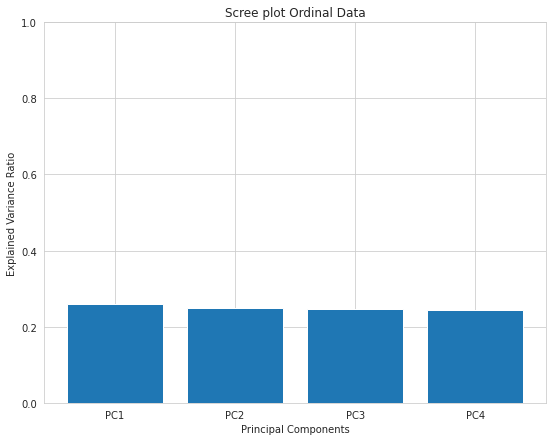

In [109]:
p_comps = [f'PC'+f'{i+1}' for i in range(pca.n_components_)]

plt.bar(p_comps, pca.explained_variance_ratio_)
plt.title('Scree plot Ordinal Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0,1);

In [0]:
# Pick data
# JUST NUMERIC
x = insurance_df[numerical_cols]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [112]:
# Let's PCA the ordinal and numerical data.
pca = PCA()
pca.fit(x_scale)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

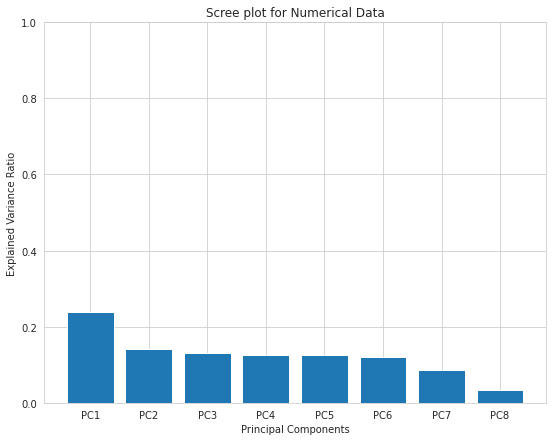

In [113]:
p_comps = [f'PC'+f'{i+1}' for i in range(pca.n_components_)]

plt.bar(p_comps, pca.explained_variance_ratio_)
plt.title('Scree plot for Numerical Data')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0,1);

## Hierarchical Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering as AggC
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.compose import ColumnTransformer

In [0]:
# Pick data
x = insurance_df[dummy_cat_cols+numerical_cols]

ct = ColumnTransformer(
            [("Num_Cols", StandardScaler(), ['Income']),
             ("Cat_Cols", 'passthrough', ['Gender_F', 'Gender_M', 'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
                                          'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired','EmploymentStatus_Unemployed', 
                                          'Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single'])])

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [0]:
clusters = [n for n in range(3,10)]
affinities = ['euclidean','manhattan','cosine']
link_ls = ['complete','average','single']

# Build Model
hi_model = [[[AggC(n_clusters = n, affinity = a, linkage = l)
              for n in clusters]
                for a in affinities]
                  for l in link_ls]

hi_model_fit = [[[hi_model[l][a][n].fit(x_scale)
                  for n in range(len(clusters))]
                    for a in range(len(affinities))]
                      for l in range(len(link_ls))]

hi_model_labels = [[[hi_model_fit[l][a][n].labels_
                     for n in range(len(clusters))]
                        for a in range(len(affinities))]
                          for l in range(len(link_ls))]

In [0]:
# Get the silhouette scores
silhouettes = [[[silhouette_score(x_scale, hi_model_labels[l][a][n], metric = affinities[a])
                  for n in range(len(clusters))]
                    for a in range(len(affinities))]
                      for l in range(len(link_ls))]

In [0]:
def min_max_avg(n_clusters, affinity, link, silhouette):
  low = min(hi_model_labels[link][affinity][n_clusters])
  high = max(hi_model_labels[link][affinity][n_clusters])
  avg = round(np.mean(hi_model_labels[link][affinity][n_clusters]),2)
  return f'Min: {low}, Max: {high}, Avg: {avg}, Score: {round(silhouette[link][affinity][n_clusters],2)}, N: {clusters[n_clusters]}, Affinity: {affinities[affinity]}, Linkage: {link_ls[link]}'

In [147]:
for n in range(len(clusters)):
  for a in range(len(affinities)):
    for l in range(len(link_ls)):
      print(min_max_avg(n,a,l,silhouettes))

Min: 0, Max: 2, Avg: 0.12, Score: 0.4, N: 3, Affinity: euclidean, Linkage: complete
Min: 0, Max: 2, Avg: 0.12, Score: 0.4, N: 3, Affinity: euclidean, Linkage: average
Min: 0, Max: 2, Avg: 0.12, Score: 0.4, N: 3, Affinity: euclidean, Linkage: single
Min: 0, Max: 2, Avg: 0.12, Score: 0.39, N: 3, Affinity: manhattan, Linkage: complete
Min: 0, Max: 2, Avg: 0.12, Score: 0.39, N: 3, Affinity: manhattan, Linkage: average
Min: 0, Max: 2, Avg: 0.12, Score: 0.39, N: 3, Affinity: manhattan, Linkage: single
Min: 0, Max: 2, Avg: 1.22, Score: 0.44, N: 3, Affinity: cosine, Linkage: complete
Min: 0, Max: 2, Avg: 1.05, Score: 0.44, N: 3, Affinity: cosine, Linkage: average
Min: 0, Max: 2, Avg: 0.12, Score: 0.14, N: 3, Affinity: cosine, Linkage: single
Min: 0, Max: 3, Avg: 0.23, Score: 0.42, N: 4, Affinity: euclidean, Linkage: complete
Min: 0, Max: 3, Avg: 0.26, Score: 0.42, N: 4, Affinity: euclidean, Linkage: average
Min: 0, Max: 3, Avg: 2.77, Score: 0.42, N: 4, Affinity: euclidean, Linkage: single
Min:

In [0]:
# Next, we will just look at the Ward link method
# Build Models
hi_model_ward = [AggC(n_clusters = n, affinity = 'euclidean', linkage = 'ward') for n in clusters]

hi_model_ward_fit = [hi_model_ward[n].fit(x_scale) for n in range(len(clusters))]

hi_model_ward_labels = [hi_model_ward_fit[n].labels_ for n in range(len(clusters))]

# Get the silhouette scores
silhouettes_ward = [[[silhouette_score(x_scale, hi_model_ward_labels[n], metric = 'euclidean') for n in range(len(clusters))] 
                      for i in range(1)] for j in range(1)]

In [149]:
for n in range(len(clusters)):
  print(min_max_avg(n,0,0,silhouettes_ward))

Min: 0, Max: 2, Avg: 0.12, Score: 0.37, N: 3, Affinity: euclidean, Linkage: complete
Min: 0, Max: 3, Avg: 0.23, Score: 0.4, N: 4, Affinity: euclidean, Linkage: complete
Min: 0, Max: 4, Avg: 1.24, Score: 0.43, N: 5, Affinity: euclidean, Linkage: complete
Min: 0, Max: 5, Avg: 1.73, Score: 0.43, N: 6, Affinity: euclidean, Linkage: complete
Min: 0, Max: 6, Avg: 3.11, Score: 0.49, N: 7, Affinity: euclidean, Linkage: complete
Min: 0, Max: 7, Avg: 3.17, Score: 0.54, N: 8, Affinity: euclidean, Linkage: complete
Min: 0, Max: 8, Avg: 2.6, Score: 0.59, N: 9, Affinity: euclidean, Linkage: complete


### Best Models

#### Model 1

* `n_clusters = 5`

* `affinity = 'euclidean'`

* `linkage = 'single'`

* Excluded location data

* Score = 0.324

In [68]:
dummy_cat_cols = [
                  # 'State_Arizona', 
                  # 'State_California', 
                  # 'State_Nevada', 
                  # 'State_Oregon',
                  # 'State_Washington', 
                  'Gender_F', 
                  'Gender_M', 
                  'Response_Yes', 
                  'Renew_Offer_Type_Offer1',
                  'Renew_Offer_Type_Offer2', 
                  'Renew_Offer_Type_Offer3',
                  'Renew_Offer_Type_Offer4', 
                  'Policy_Type_Corporate Auto',
                  'Policy_Type_Personal Auto', 
                  'Policy_Type_Special Auto',
                  # 'Location_Code_Rural', 
                  # 'Location_Code_Suburban', 
                  # 'Location_Code_Urban',
                  'EmploymentStatus_Disabled', 
                  'EmploymentStatus_Employed',
                  'EmploymentStatus_Medical Leave', 
                  'EmploymentStatus_Retired',
                  'EmploymentStatus_Unemployed', 
                  'Marital_Status_Divorced',
                  'Marital_Status_Married', 
                  'Marital_Status_Single',
                  'Policy_Corporate L1', 
                  'Policy_Corporate L2', 
                  'Policy_Corporate L3',
                  'Policy_Personal L1', 
                  'Policy_Personal L2', 
                  'Policy_Personal L3',
                  'Policy_Special L1', 
                  'Policy_Special L2', 
                  'Policy_Special L3',
                  'Sales_Channel_Agent', 
                  'Sales_Channel_Branch',
                  'Sales_Channel_Call Center', 
                  'Sales_Channel_Web'
                 ]

# Pick data
x = insurance_df[dummy_cat_cols]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# This is for the full set of categorical fields
hier = AggC(n_clusters=5, affinity='euclidean', linkage='single')
hier_fit = hier.fit(x_scale)
silhouette_score(x_scale, hier_fit.labels_, metric='euclidean')

0.3237864139144772

#### Model 2

* `n_clusters = 7`

* `affinity = 'manhattan'`

* `linkage = 'single'`

* Excluded location data, personal data

* Score = 0.448

In [115]:
dummy_cat_cols = [
                  'Response_Yes', 
                  'Renew_Offer_Type_Offer1',
                  'Renew_Offer_Type_Offer2', 
                  'Renew_Offer_Type_Offer3',
                  'Renew_Offer_Type_Offer4', 
                  'Policy_Type_Corporate Auto',
                  'Policy_Type_Personal Auto', 
                  'Policy_Type_Special Auto',
                  'Policy_Corporate L1', 
                  'Policy_Corporate L2', 
                  'Policy_Corporate L3',
                  'Policy_Personal L1', 
                  'Policy_Personal L2', 
                  'Policy_Personal L3',
                  'Policy_Special L1', 
                  'Policy_Special L2', 
                  'Policy_Special L3',
                  'Sales_Channel_Agent', 
                  'Sales_Channel_Branch',
                  'Sales_Channel_Call Center', 
                  'Sales_Channel_Web'
                 ]

# Pick data
x = insurance_df[dummy_cat_cols]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# This is for the full set of categorical fields
hier = AggC(n_clusters=7, affinity='manhattan', linkage='single')
hier_fit = hier.fit(x_scale)
silhouette_score(x_scale, hier_fit.labels_, metric='manhattan')

0.4480887108603552

#### Model 3 - Best Model Found

* `n_clusters = 8`

* `affinity = 'cosine'`

* `linkage = 'complete'` or `linkage = 'average'` or `linkage = 'single'`

* include only personal info

* Score: 0.73 - 0.74, 


In [0]:
features = [
            'Income',
            'Gender_F', 
            'Gender_M', 
            'EmploymentStatus_Disabled', 
            'EmploymentStatus_Employed',
            'EmploymentStatus_Medical Leave', 
            'EmploymentStatus_Retired',
            'EmploymentStatus_Unemployed', 
            'Marital_Status_Divorced',
            'Marital_Status_Married', 
            'Marital_Status_Single',
           ]

ct = ColumnTransformer(
            [("Num_Cols", StandardScaler(), ['Income']),
             ("Cat_Cols", 'passthrough', ['Gender_F', 'Gender_M', 'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
                                          'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired','EmploymentStatus_Unemployed', 
                                          'Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single'])])

# Pick data
x = insurance_df[features]

# Scale data
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Scale Numerical data
x_trans = ct.fit_transform(x)

In [9]:
# For all scaled
hier_scale = AggC(n_clusters=8, affinity='cosine', linkage='complete')
hier_fit_scale = hier_scale.fit(x_scale)
silhouette_score(x_scale, hier_fit_scale.labels_, metric='cosine')

0.7385997379315665

In [10]:
# For numeric scaled
hier_trans = AggC(n_clusters=5, affinity='manhattan', linkage='average')
hier_fit_trans = hier_trans.fit(x_scale)
silhouette_score(x_trans, hier_fit_trans.labels_, metric='manhattan')

0.46929468378223566

In [0]:
insurance_df['AggC_Labels_Scale'] = hier_fit_scale.labels_
insurance_df['AggC_Labels_Trans'] = hier_fit_trans.labels_

In [83]:
pd.set_option('display.max_columns',None)
marital_group = insurance_df.groupby('AggC_Labels_Scale').mean()
marital_group
# Unemployed
# Employed Single
# Employed Married Female
# Employed Divorced
# Disabled
# Employed Married Male
# Medical_Leave
# Retired

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Vehicle_Size_Num,Vehicle_Class_Num,Response_Yes,Coverage_Num,Education_Num,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Gender_F,Gender_M,Renew_Offer_Type_Offer1,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,AggC_Labels_Trans
AggC_Labels_Scale,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7636.324558,0.000000,93.973241,15.244281,48.747087,0.391886,3.010790,599.579795,1.913681,2.296936,0.085455,1.488994,2.114372,0.185585,0.347000,0.093656,0.286577,0.087182,0.489858,0.510142,0.530427,0.233492,0.154079,0.082003,0.217523,0.742339,0.040138,0.046612,0.915839,0.037549,0.0,0.0,0.0,0.0,1.0,0.088908,0.334916,0.576176,0.043159,0.068192,0.106172,0.135952,0.232197,0.374191,0.005179,0.019422,0.015537,0.390160,0.277514,0.188174,0.144152,4.0
1,8228.044633,55696.912859,94.245484,14.749203,45.349628,0.395324,2.851222,378.320340,1.894793,2.267800,0.172157,1.502657,2.339001,0.164718,0.349628,0.112646,0.277365,0.095643,0.479277,0.520723,0.400638,0.346440,0.153029,0.099894,0.210414,0.741764,0.047821,0.268863,0.503719,0.227418,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.027630,0.066950,0.115834,0.128587,0.250797,0.362380,0.006376,0.017003,0.024442,0.394261,0.279490,0.187035,0.139214,0.0
2,8190.599412,56808.288932,92.989226,14.813418,47.453967,0.360921,3.041626,338.173824,1.914789,2.240451,0.105779,1.488247,2.365818,0.190010,0.336435,0.093046,0.292850,0.087659,1.000000,0.000000,0.312439,0.375612,0.169931,0.142018,0.211068,0.742409,0.046523,0.304603,0.407444,0.287953,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.041626,0.064643,0.104799,0.144956,0.207640,0.389814,0.008815,0.022527,0.015181,0.356024,0.290402,0.198335,0.155240,0.0
3,8428.333708,56327.043820,93.080899,14.875281,50.026966,0.415730,2.889888,363.092362,1.893258,2.196629,0.168539,1.485393,2.473034,0.195506,0.328090,0.112360,0.280899,0.083146,0.498876,0.501124,0.443820,0.303371,0.159551,0.093258,0.233708,0.740449,0.025843,0.284270,0.496629,0.219101,0.0,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.037079,0.066292,0.130337,0.133708,0.221348,0.385393,0.007865,0.007865,0.010112,0.386517,0.251685,0.211236,0.150562,0.0
4,7847.883951,20045.582716,93.674074,14.893827,47.469136,0.276543,2.886420,474.711480,1.896296,2.301235,0.177778,1.464198,2.397531,0.207407,0.323457,0.096296,0.296296,0.076543,0.602469,0.397531,0.555556,0.219753,0.140741,0.083951,0.202469,0.753086,0.044444,0.081481,0.841975,0.076543,1.0,0.0,0.0,0.0,0.0,0.241975,0.629630,0.128395,0.044444,0.034568,0.123457,0.158025,0.266667,0.328395,0.019753,0.017284,0.007407,0.343210,0.288889,0.224691,0.143210,2.0
5,8144.416986,56294.072329,92.994521,15.501918,48.366027,0.415342,2.990685,368.083493,1.909041,2.271233,0.124932,1.466301,2.298082,0.188493,0.355616,0.087671,0.280548,0.087671,0.000000,1.000000,0.266301,0.407671,0.169863,0.156164,0.219726,0.739726,0.040548,0.256438,0.515068,0.228493,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.038356,0.069041,0.112329,0.132055,0.240548,0.367123,0.005479,0.017534,0.017534,0.378082,0.296438,0.198904,0.126575,0.0
6,7641.812500,20292.770833,90.011574,15.793981,48.141204,0.328704,2.981481,471.933903,1.905093,2.178241,0.180556,1.444444,2.277778,0.185185,0.349537,0.104167,0.273148,0

In [0]:
marital_employed = marital_group.iloc[[1,3,2,5]]
mari_types = ['Single','Divorced','Married Female','Married Male']
pltData3 = marital_employed['Number_of_Open_Complaints']

In [99]:
marital_employed

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Vehicle_Size_Num,Vehicle_Class_Num,Response_Yes,Coverage_Num,Education_Num,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Gender_F,Gender_M,Renew_Offer_Type_Offer1,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,AggC_Labels_Trans
AggC_Labels_Scale,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8228.044633,55696.912859,94.245484,14.749203,45.349628,0.395324,2.851222,378.320340,1.894793,2.267800,0.172157,1.502657,2.339001,0.164718,0.349628,0.112646,0.277365,0.095643,0.479277,0.520723,0.400638,0.346440,0.153029,0.099894,0.210414,0.741764,0.047821,0.268863,0.503719,0.227418,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.027630,0.066950,0.115834,0.128587,0.250797,0.362380,0.006376,0.017003,0.024442,0.394261,0.279490,0.187035,0.139214,0.0
3,8428.333708,56327.043820,93.080899,14.875281,50.026966,0.415730,2.889888,363.092362,1.893258,2.196629,0.168539,1.485393,2.473034,0.195506,0.328090,0.112360,0.280899,0.083146,0.498876,0.501124,0.443820,0.303371,0.159551,0.093258,0.233708,0.740449,0.025843,0.284270,0.496629,0.219101,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.037079,0.066292,0.130337,0.133708,0.221348,0.385393,0.007865,0.007865,0.010112,0.386517,0.251685,0.211236,0.150562,0.0
2,8190.599412,56808.288932,92.989226,14.813418,47.453967,0.360921,3.041626,338.173824,1.914789,2.240451,0.105779,1.488247,2.365818,0.190010,0.336435,0.093046,0.292850,0.087659,1.000000,0.000000,0.312439,0.375612,0.169931,0.142018,0.211068,0.742409,0.046523,0.304603,0.407444,0.287953,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.041626,0.064643,0.104799,0.144956,0.207640,0.389814,0.008815,0.022527,0.015181,0.356024,0.290402,0.198335,0.155240,0.0
5,8144.416986,56294.072329,92.994521,15.501918,48.366027,0.415342,2.990685,368.083493,1.909041,2.271233,0.124932,1.466301,2.298082,0.188493,0.355616,0.087671,0.280548,0.087671,0.000000,1.000000,0.266301,0.407671,0.169863,0.156164,0.219726,0.739726,0.040548,0.256438,0.515068,0.228493,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.038356,0.069041,0.112329,0.132055,0.240548,0.367123,0.005479,0.017534,0.017534,0.378082,0.296438,0.198904,0.126575,0.0


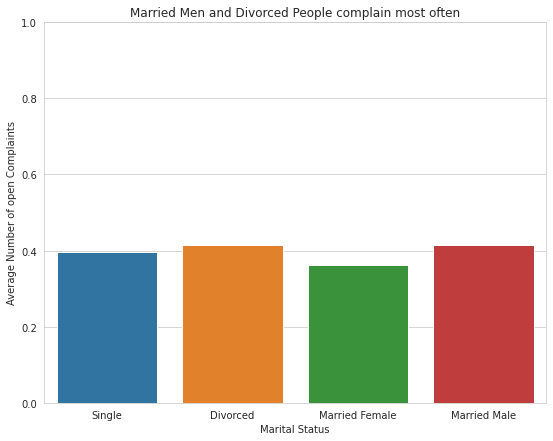

In [98]:
sns.barplot(x = mari_types,y=pltData3)
plt.ylim(0,1)
plt.ylabel('Average Number of open Complaints')
plt.xlabel('Marital Status')
plt.title('Married Men and Divorced People complain most often');

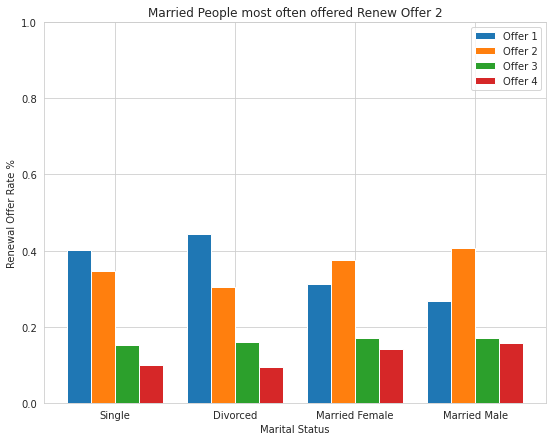

In [94]:
barWidth = 0.2
 
# set height of bar
bars1 = marital_employed['Renew_Offer_Type_Offer1']
bars2 = marital_employed['Renew_Offer_Type_Offer2']
bars3 = marital_employed['Renew_Offer_Type_Offer3']
bars4 = marital_employed['Renew_Offer_Type_Offer4']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))-0.1
r2 = [x + barWidth  for x in r1]
r3 = [x + barWidth  for x in r2]
r4 = [x + barWidth  for x in r3]
 
plt.rcParams["figure.figsize"] = (9,7)
# Make the plot
plt.bar(r1, bars1, color='#1f77b4', width=barWidth, edgecolor='white', label='Offer 1')
plt.bar(r2, bars2, color='#ff7f0e', width=barWidth, edgecolor='white', label='Offer 2')
plt.bar(r3, bars3, color='#2ca02c', width=barWidth, edgecolor='white', label='Offer 3')
plt.bar(r4, bars4, color='#d62728', width=barWidth, edgecolor='white', label='Offer 4')
 
# Add xticks on the middle of the group bars
plt.xlabel('Marital Status')
plt.xticks([r + barWidth for r in range(len(bars1))], mari_types)
plt.ylabel('Renewal Offer Rate %')
plt.ylim(0,1)
plt.title('Married People most often offered Renew Offer 2')

# Create legend & Show graphic
plt.legend()
plt.show()

In [16]:
employment_group = insurance_df.groupby('AggC_Labels_Trans').mean()
employment_group
# Employed
# Medical Leave
# Disabled
# Retired
# Unemployed

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Vehicle_Size_Num,Vehicle_Class_Num,Response_Yes,Coverage_Num,Education_Num,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Gender_F,Gender_M,Renew_Offer_Type_Offer1,Renew_Offer_Type_Offer2,Renew_Offer_Type_Offer3,Renew_Offer_Type_Offer4,Policy_Type_Corporate Auto,Policy_Type_Personal Auto,Policy_Type_Special Auto,Location_Code_Rural,Location_Code_Suburban,Location_Code_Urban,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Sales_Channel_Agent,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,AggC_Labels_Scale
AggC_Labels_Trans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8219.124605,56384.884521,93.212706,15.032994,47.800456,0.392594,2.970165,358.275705,1.906283,2.247982,0.132678,1.483152,2.356441,0.186206,0.343454,0.097578,0.284486,0.088277,0.515444,0.484556,0.332748,0.369779,0.165497,0.131976,0.217269,0.741137,0.041594,0.280098,0.471744,0.248157,0.0,1.0,0.0,0.0,0.0,0.156195,0.678659,0.165146,0.037557,0.066690,0.113022,0.136364,0.227448,0.377325,0.007196,0.017726,0.016673,0.374166,0.284486,0.198666,0.142682,2.951913
1,7641.812500,20292.770833,90.011574,15.793981,48.141204,0.328704,2.981481,471.933903,1.905093,2.178241,0.180556,1.444444,2.277778,0.185185,0.349537,0.104167,0.273148,0.087963,0.495370,0.504630,0.537037,0.259259,0.120370,0.083333,0.208333,0.747685,0.043981,0.083333,0.819444,0.097222,0.0,0.0,1.0,0.0,0.0,0.157407,0.657407,0.185185,0.039352,0.071759,0.097222,0.115741,0.266204,0.365741,0.006944,0.023148,0.013889,0.351852,0.270833,0.201389,0.175926,6.000000
2,7847.883951,20045.582716,93.674074,14.893827,47.469136,0.276543,2.886420,474.711480,1.896296,2.301235,0.177778,1.464198,2.397531,0.207407,0.323457,0.096296,0.296296,0.076543,0.602469,0.397531,0.555556,0.219753,0.140741,0.083951,0.202469,0.753086,0.044444,0.081481,0.841975,0.076543,1.0,0.0,0.0,0.0,0.0,0.241975,0.629630,0.128395,0.044444,0.034568,0.123457,0.158025,0.266667,0.328395,0.019753,0.017284,0.007407,0.343210,0.288889,0.224691,0.143210,4.000000
3,7487.879433,20554.960993,91.418440,14.404255,48.531915,0.397163,2.609929,489.901069,1.996454,2.290780,0.723404,1.439716,2.202128,0.170213,0.379433,0.088652,0.276596,0.085106,0.453901,0.546099,0.602837,0.273050,0.081560,0.042553,0.191489,0.769504,0.039007,0.000000,0.971631,0.028369,0.0,0.0,0.0,1.0,0.0,0.379433,0.411348,0.209220,0.035461,0.042553,0.113475,0.120567,0.230496,0.418440,0.007092,0.003546,0.028369,0.531915,0.244681,0.067376,0.156028,7.000000
4,7636.324558,0.000000,93.973241,15.244281,48.747087,0.391886,3.010790,599.579795,1.913681,2.296936,0.085455,1.488994,2.114372,0.185585,0.347000,0.093656,0.286577,0.087182,0.489858,0.510142,0.530427,0.233492,0.154079,0.082003,0.217523,0.742339,0.040138,0.046612,0.915839,0.037549,0.0,0.0,0.0,0.0,1.0,0.088908,0.334916,0.576176,0.043159,0.068192,0.106172,0.135952,0.232197,0.374191,0.005179,0.019422,0.015537,0.390160,0.277514,0.188174,0.144152,0.000000


In [0]:
emp_types = ['Employed','Med Leave','Disabled','Retired','Unemployed']
pltData = employment_group['Total_Claim_Amount']
pltData2 = employment_group['Response_Yes']

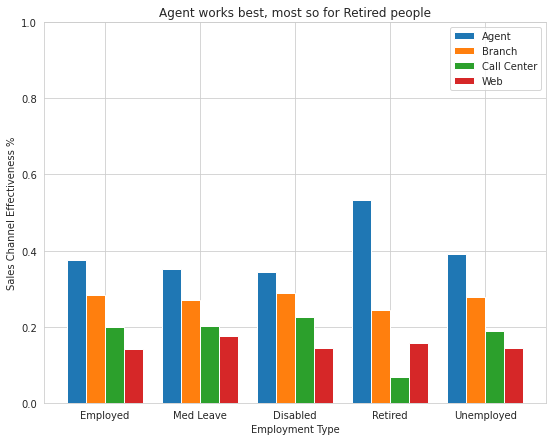

In [73]:
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = employment_group['Sales_Channel_Agent']
bars2 = employment_group['Sales_Channel_Branch']
bars3 = employment_group['Sales_Channel_Call Center']
bars4 = employment_group['Sales_Channel_Web']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))-0.1
r2 = [x + barWidth  for x in r1]
r3 = [x + barWidth  for x in r2]
r4 = [x + barWidth  for x in r3]
 
plt.rcParams["figure.figsize"] = (9,7)
# Make the plot
plt.bar(r1, bars1, color='#1f77b4', width=barWidth, edgecolor='white', label='Agent')
plt.bar(r2, bars2, color='#ff7f0e', width=barWidth, edgecolor='white', label='Branch')
plt.bar(r3, bars3, color='#2ca02c', width=barWidth, edgecolor='white', label='Call Center')
plt.bar(r4, bars4, color='#d62728', width=barWidth, edgecolor='white', label='Web')
 
# Add xticks on the middle of the group bars
plt.xlabel('Employment Type')
plt.xticks([r + barWidth for r in range(len(bars1))], emp_types)
plt.ylabel('Sales Channel Effectiveness %')
plt.ylim(0,1)
plt.title('Agent works best, most so for Retired people')

# Create legend & Show graphic
plt.legend()
plt.show()

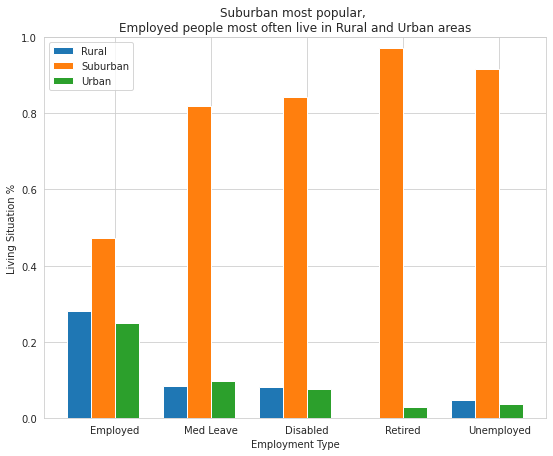

In [78]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = employment_group['Location_Code_Rural']
bars2 = employment_group['Location_Code_Suburban']
bars3 = employment_group['Location_Code_Urban']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))-0.125
r2 = [x + barWidth  for x in r1]
r3 = [x + barWidth  for x in r2]
 
plt.rcParams["figure.figsize"] = (9,7)
# Make the plot
plt.bar(r1, bars1, color='#1f77b4', width=barWidth, edgecolor='white', label='Rural')
plt.bar(r2, bars2, color='#ff7f0e', width=barWidth, edgecolor='white', label='Suburban')
plt.bar(r3, bars3, color='#2ca02c', width=barWidth, edgecolor='white', label='Urban')
 
# Add xticks on the middle of the group bars
plt.xlabel('Employment Type')
plt.xticks([r + barWidth for r in range(len(bars1))], emp_types)
plt.ylabel('Living Situation %')
plt.ylim(0,1)
plt.title('Suburban most popular, \nEmployed people most often live in Rural and Urban areas')

# Create legend & Show graphic
plt.legend()
plt.show()

In [44]:
zsns.color_palette().as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

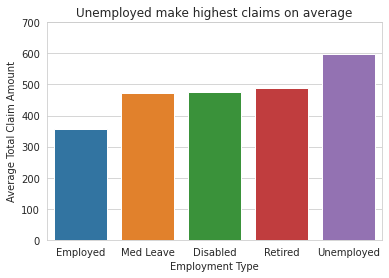

In [30]:
sns.barplot(x = emp_types,y=pltData)
plt.ylim(0,700)
plt.ylabel('Average Total Claim Amount')
plt.xlabel('Employment Type')
plt.title('Unemployed make highest claims on average');

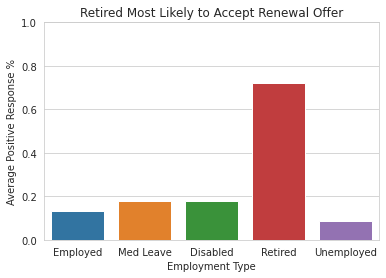

In [33]:
sns.barplot(x = emp_types,y=pltData2)
plt.ylim(0,1)
plt.ylabel('Average Positive Response %')
plt.xlabel('Employment Type')
plt.title('Retired Most Likely to Accept Renewal Offer');

#### Some interesting Points


* The clustering grouped all of the people with no income in one cluster (these people are also all unemployed)

* Those with the highest and lowest income seem to tied for a slightly higher number of open complaints

* Those who are unemployed make the largest claim amounts, while those with the highest income make the lowest claims

* Lower income individuals seem to select Renew 1, Higher income individuals tend to selet Offer 2 and 4

* Higher income individuals have the highest CLV

* Higher income individuals are much more likely to like in Rural or Urban areas, where as lower income individuals are much more likely to live in suburban areas

* About 72% of retired people responded yes to the new offer, while only as high as 18% for any other employment group


### Dendrogram

In [0]:
links = linkage(x_scale, method = 'average', metric = 'euclidean')

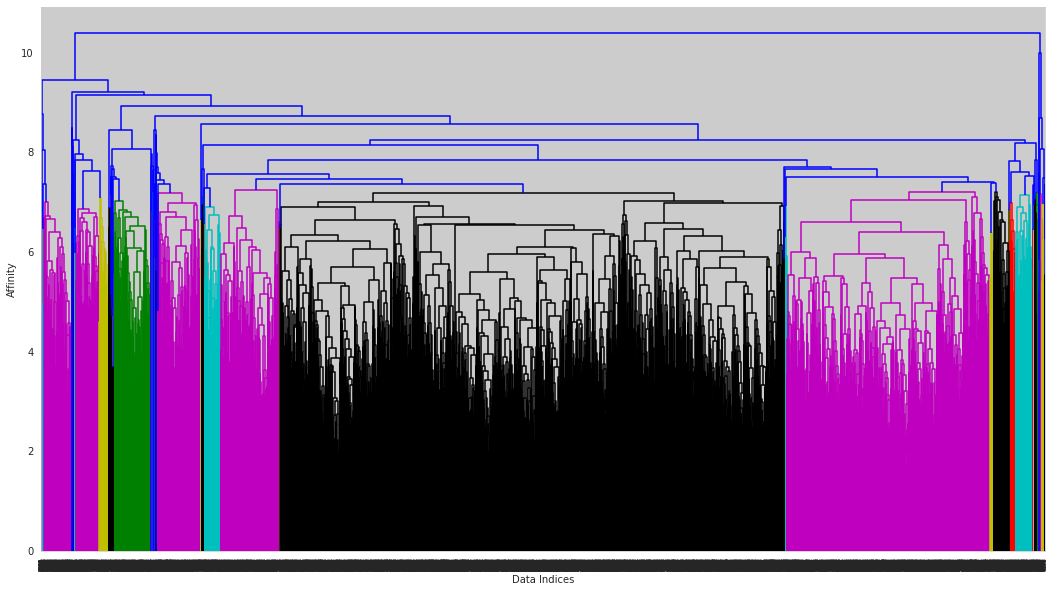

In [11]:
# Plot the figure using dendrogram
plt.figure(figsize=(18,10))
dendrogram(links)
plt.ylabel('Affinity')
plt.xlabel('Data Indices');